In [1]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt


In [2]:
DATA_PATH = 'data/heart_processed.csv'
df = pd.read_csv(DATA_PATH)
X = df.drop(columns=['target'])
y = df['target']


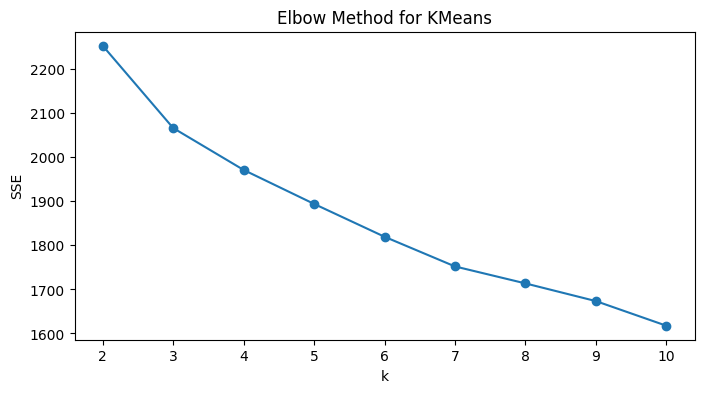

In [4]:


# KMeans - elbow method
sse = []
K = range(2, 11)
for k in K:
	km = KMeans(n_clusters=k, random_state=42)
	km.fit(X)
	sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, 'o-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for KMeans')
plt.show()


In [5]:


# Fit KMeans with chosen k (example k=2)
km = KMeans(n_clusters=2, random_state=42)
labels_km = km.fit_predict(X)
print('KMeans silhouette:', silhouette_score(X, labels_km))
print('KMeans adjusted rand vs true labels:', adjusted_rand_score(y, labels_km))



KMeans silhouette: 0.16942874337532074
KMeans adjusted rand vs true labels: 0.346787943626812


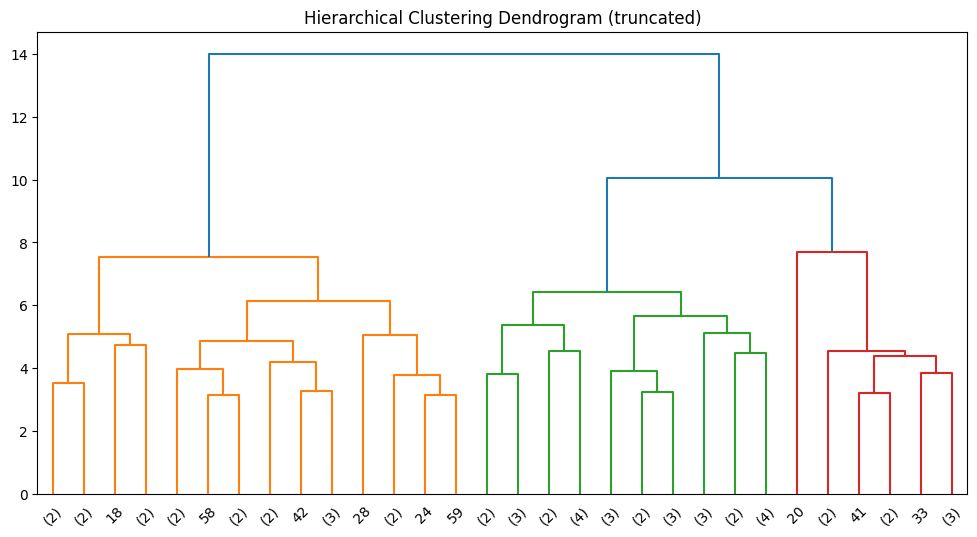

In [6]:

# Hierarchical clustering
Z = linkage(X.sample(frac=0.2, random_state=42), method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.show()



In [7]:

# Full hierarchical on entire set may be slow; alternatively, compute clusters
Z_full = linkage(X, method='ward')
h_labels = fcluster(Z_full, t=2, criterion='maxclust')
print('Hierarchical adjusted rand vs true labels:', adjusted_rand_score(y, h_labels))

Hierarchical adjusted rand vs true labels: 0.21942963022399964
